## Exploratory Data Analysis
Code written by Anna Haas and edited by Julia Taussig

In [1]:
#Imports:

import numpy as np                # import numpy
import pandas as pd               # import pandas

import matplotlib.pyplot as plt   # import matplotlib
import seaborn as sns             # import seaborn

%matplotlib inline

In [2]:
# Read in train and test
train = pd.read_csv('./data/large_train_sample.csv')
test = pd.read_csv('./data/test_data.csv')

In [3]:
# Any nulls?
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [4]:
# Data types
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [6]:
# Column 1: Workclass
train['workclass'].value_counts()
# Need to fill in ?

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
# Columnn 2: Education
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
# Columnn 2: Education
train['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [9]:
train[['education-num', 'education']]

,education-num,education
0,13,Bachelors
1,13,Bachelors
2,9,HS-grad
3,7,11th
4,13,Bachelors
5,14,Masters
6,5,9th
7,9,HS-grad
8,14,Masters
9,13,Bachelors


In [10]:
# Columnn 3: Marital-status
train['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [11]:
# age is between 17 and 90
print(train['age'].min())
print(train['age'].max())

17
90


In [12]:
# turn sex into is_male
train['is_male'] = train['sex'].map(lambda x: 1 if x == 'male' else 0)

In [13]:
# Get dummies
train_dum = pd.get_dummies(train, drop_first=True)

In [14]:
train_dum.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,is_male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,wage_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
train_dum.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'is_male', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ 

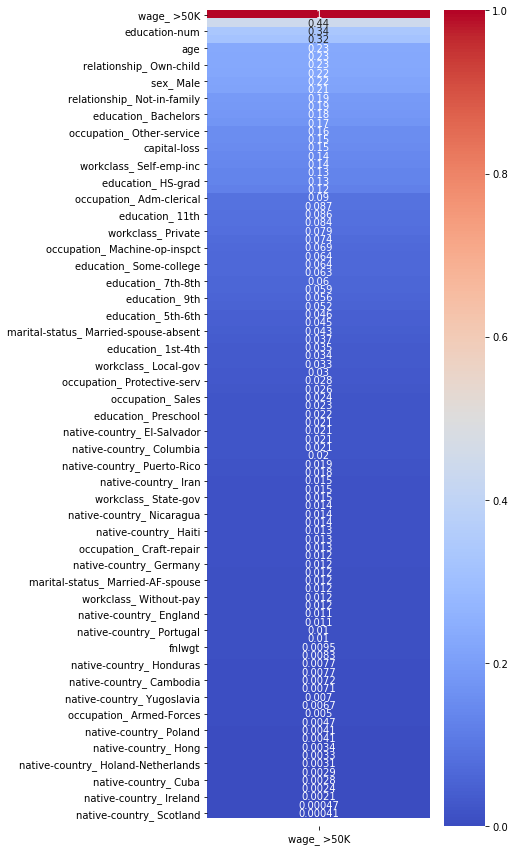

In [16]:
# Correlation heatmap looking at numerical feature vs wage (absolute value of correlation)
plt.figure(figsize=(5,15))

sns.heatmap(abs(train_dum.corr()[['wage_ >50K']]).sort_values('wage_ >50K', ascending=False),
            annot=True,
            cmap='coolwarm');

In [17]:
train_dum.corr()[abs(train_dum.corr()['wage_ >50K']) > .2][['wage_ >50K']]

,wage_ >50K
age,0.234037
education-num,0.335154
capital-gain,0.223329
hours-per-week,0.229689
marital-status_ Married-civ-spouse,0.444696
marital-status_ Never-married,-0.318440
occupation_ Exec-managerial,0.214861
relationship_ Own-child,-0.228532
sex_ Male,0.215980
wage_ >50K,1.000000


In [18]:
train_dum.corr()[abs(train_dum.corr()['wage_ >50K']) > .2][['wage_ >50K']].index

Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'marital-status_ Married-civ-spouse', 'marital-status_ Never-married',
       'occupation_ Exec-managerial', 'relationship_ Own-child', 'sex_ Male',
       'wage_ >50K'],
      dtype='object')

In [19]:
# Plotting how marital status affects income

In [20]:
# See what numerical features would be best as interaction terms

# Remove all categorical columns from train and set to new dataframe
num_train_dum = train_dum[train_dum._get_numeric_data().columns]

In [21]:
train_dum.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,is_male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,wage_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from itertools import combinations

In [23]:
# See what numerical features would be best as interaction terms

# Remove all categorical columns from train and set to new dataframe
num_train = train_dum[train_dum._get_numeric_data().columns]

In [24]:
# Remove 'SalePrice'
num_train.drop(columns = 'wage_ >50K', inplace=True)

In [25]:
# Iterate through random combinations of 2 features to find the ones that create the highest correlated 
# interaction feature with Sale Price
combos = list(combinations(num_train, 2))

best_interaction_terms = []

for predictor_set in combos:

    predictor_list = list(predictor_set)
    current_corr = np.corrcoef(train_dum[predictor_list[0]] * train_dum[predictor_list[1]], train_dum['wage_ >50K'])[0][1]

    if current_corr > 0.35:
        print('Best Terms: ', predictor_set)
        print('Best Correlation: ', current_corr)
        print()

Best Terms:  ('age', 'education-num')
Best Correlation:  0.393085632979728

Best Terms:  ('age', 'marital-status_ Married-civ-spouse')
Best Correlation:  0.4405717577562587

Best Terms:  ('fnlwgt', 'marital-status_ Married-civ-spouse')

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]



Best Correlation:  0.36023063291503943

Best Terms:  ('education-num', 'hours-per-week')
Best Correlation:  0.371399343659375

Best Terms:  ('education-num', 'marital-status_ Married-civ-spouse')
Best Correlation:  0.5246618564678448

Best Terms:  ('hours-per-week', 'marital-status_ Married-civ-spouse')
Best Correlation:  0.4586187543382134

Best Terms:  ('marital-status_ Married-civ-spouse', 'sex_ Male')
Best Correlation:  0.39892760645419956

Best Terms:  ('marital-status_ Married-civ-spouse', 'native-country_ United-States')
Best Correlation:  0.4231167322806023



In [26]:
# Compare interaction to original correlations
print('Education-num: ', np.corrcoef(train_dum['education-num'], train_dum['wage_ >50K'])[0][1])
print('Marital-status_married civ: ', np.corrcoef(train_dum['marital-status_ Married-civ-spouse'], train_dum['wage_ >50K'])[0][1])
print('Interaction Term: ', np.corrcoef(train_dum['education-num'] * train_dum['marital-status_ Married-civ-spouse'], train_dum['wage_ >50K'])[0][1])

Education-num:  0.3351539526909413
Marital-status_married civ:  0.4446961550463136
Interaction Term:  0.5246618564678448


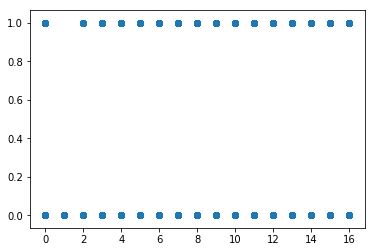

In [27]:
plt.scatter((train_dum['education-num'] * train_dum['marital-status_ Married-civ-spouse']), train_dum['wage_ >50K'])

In [28]:
train_dum.groupby(by='wage_ >50K').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,is_male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
wage_ >50K,,,,,,,,,,,,,,,,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210,0.0,0.023827,0.059709,0.000283,...,0.001335,0.004126,0.000364,0.002589,0.001254,0.000607,0.000688,0.889927,0.002508,0.000405
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026,0.0,0.047315,0.078689,0.000000,...,0.000510,0.001530,0.000383,0.002041,0.002551,0.000383,0.000255,0.914552,0.000638,0.000765


In [29]:
## MODEL TESTING - LASSO

In [29]:
# Imports:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
# Reference: notes from feature-selection notebook by Sam Stack

# Baseline Accuracy Score 
train['wage'].value_counts(normalize=True)             # target

 <=50K    0.75919
 >50K     0.24081
Name: wage, dtype: float64

In [31]:
# Select 100 features to use
abs(train_dum.corr()['wage_ >50K']).sort_values(ascending=False).head(100)

wage_ >50K                                    1.000000
marital-status_ Married-civ-spouse            0.444696
education-num                                 0.335154
marital-status_ Never-married                 0.318440
age                                           0.234037
hours-per-week                                0.229689
relationship_ Own-child                       0.228532
capital-gain                                  0.223329
sex_ Male                                     0.215980
occupation_ Exec-managerial                   0.214861
relationship_ Not-in-family                   0.188497
occupation_ Prof-specialty                    0.185866
education_ Bachelors                          0.180485
education_ Masters                            0.174570
occupation_ Other-service                     0.156348
education_ Prof-school                        0.154907
capital-loss                                  0.150526
relationship_ Unmarried                       0.142857
workclass_

In [32]:
# Start with a model that contains the top correlated features
# I will then make the model simpler
top_features = abs(train_dum.corr()['wage_ >50K']).sort_values(ascending=False).head(100).keys()
features = [col for col in top_features if col != 'wage_ >50K']

In [33]:
# Create X and y variables
X = train_dum[features]
y = train_dum['wage_ >50K']

In [34]:
# Train/test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# Scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [35]:
# Instantiate models
logreg = LogisticRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [36]:
# Cross Validation
print('LR Score: ', cross_val_score(logreg, X_train_s, y_train, cv=5).mean())
print('Lasso Score: ', cross_val_score(lasso, X_train_s, y_train, cv=5).mean())
print('Ridge Score: ', cross_val_score(ridge, X_train_s, y_train, cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR Score:  0.8503617770733017


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

Lasso Score:  0.3631123387905351
Ridge Score:  0.3630759501040893


In [37]:
logreg.fit(X_train_s, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Use np.exp() to exponentiate the coefficient.
# To interpret how likely something is to happen when X goes up by 1 unit

for column, coef in zip(features, np.exp(logreg.coef_)[0]):
    if coef < 0.8:
        print(column, coef)

marital-status_ Never-married 0.7823735939471048
relationship_ Own-child 0.7995575703968941
occupation_ Priv-house-serv 0.7721555014853558
education_ Preschool 0.6511032998301808


In [39]:
# Select 100 features to use
abs(train_dum.corr()['wage_ >50K']).sort_values(ascending=False).head(10)

wage_ >50K                            1.000000
marital-status_ Married-civ-spouse    0.444696
education-num                         0.335154
marital-status_ Never-married         0.318440
age                                   0.234037
hours-per-week                        0.229689
relationship_ Own-child               0.228532
capital-gain                          0.223329
sex_ Male                             0.215980
occupation_ Exec-managerial           0.214861
Name: wage_ >50K, dtype: float64

In [40]:
top_features = ['marital-status_ Married-civ-spouse', 'age', 'marital-status_ Never-married', 'education-num', 
                'hours-per-week', 'relationship_ Own-child', 'capital-gain', 'sex_ Male', 'occupation_ Exec-managerial']

In [41]:
X = train_dum[top_features]
y = train_dum['wage_ >50K']

In [42]:
X.head()

,marital-status_ Married-civ-spouse,age,marital-status_ Never-married,education-num,hours-per-week,relationship_ Own-child,capital-gain,sex_ Male,occupation_ Exec-managerial
0,0,39,1,13,40,0,2174,1,0
1,1,50,0,13,13,0,0,1,1
2,0,38,0,9,40,0,0,1,0
3,1,53,0,7,40,0,0,1,0
4,1,28,0,13,40,0,0,0,0


In [43]:
# Train/test split (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# Scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [44]:
logreg.fit(X_train_s, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Score the model
print('Train Score: ', logreg.score(X_train_s, y_train))
print('Test Score: ', logreg.score(X_test_s, y_test))
print('CV Score: ', cross_val_score(logreg, X_train_s, y_train, cv=5).mean())

Train Score:  0.8413868413868414
Test Score:  0.8489407430150445


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV Score:  0.8409773169437823


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,is_male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0


In [48]:
pd.to_pickle(train, './train_clean.pkl')

In [49]:
pd.read_pickle('./data/train_clean.pkl')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,is_male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K,0
